In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt

## Importing the data

In [2]:
traindata=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
testdata=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Shape or dimentions of train and test data

In [4]:
traindata.shape  , testdata.shape

((1460, 81), (1459, 80))

In [5]:
traindata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Linear model make some assumption :
1. Linear Relationship
2. No auto-correlation between error term 
3. No milticollinearity between independent variabel
4. Normal Distribution of error term
5. Homoscedasticity

we will take this assumption into consideartion while  bulding the model

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
traindata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Lets look at depended variabel i.e SalePrice

In [8]:
traindata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


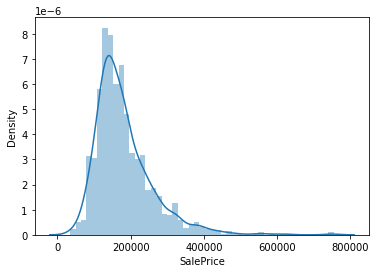

In [9]:
sns.distplot(traindata['SalePrice']);

from above graph we can say that SalePrice is positively skewed , let  calulate the skewness and Kurtosis 

In [10]:
print('Skewness :%f' %traindata['SalePrice'].skew())

Skewness :1.882876


Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values(Outlier).

In [11]:
print('Kurtosis : %f' %traindata['SalePrice'].kurt())

Kurtosis : 6.536282


### Lets take a look at correlation for trainindata set

In [12]:
traindata.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

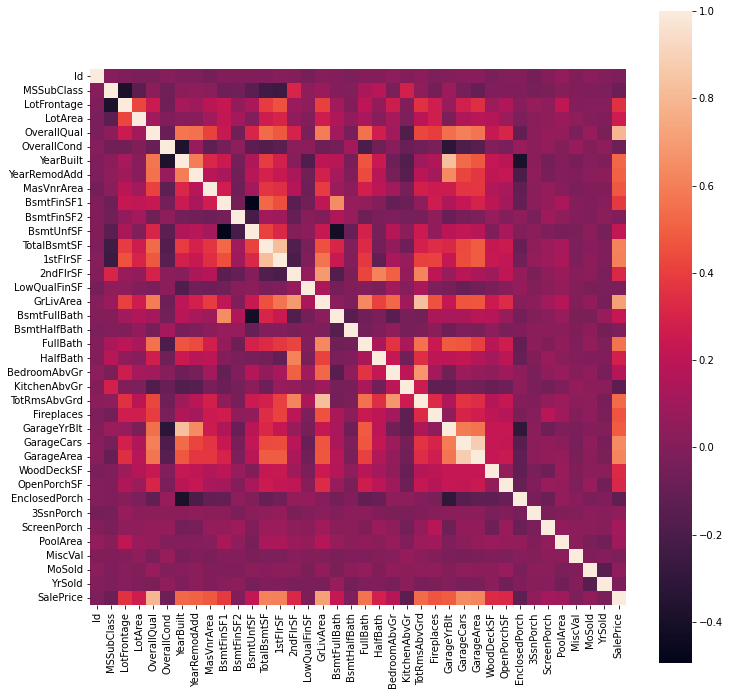

In [13]:
corrmat = traindata.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat,square = True )

<AxesSubplot:>

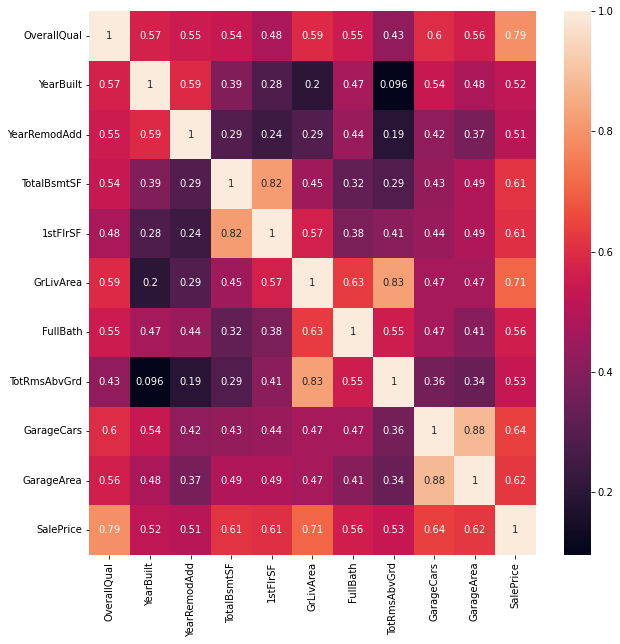

In [14]:
corrmat=traindata.corr()
top_corr=corrmat.index[abs(corrmat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(traindata[top_corr].corr() ,annot=True)

In [15]:
traindata.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#### From the above heatmap of correlaion we can say that OverallQual , GrLivArea , GarageCars, GarageArea , TotalBsmtSF, 1stFlrSF are highly related with SalePrice
If we take look at multicolinearity then 
1. TotalBsmtSF  vs 1stFlrSF 
2. TotRmsAbvGrd vs GrLivArea
3. GrageArea vs GrageCars

#### Lets plot the scatter plot  OverallQual , GrLivArea , GarageCars, GarageArea , TotalBsmtSF, 1stFlrSF  and saleprice 

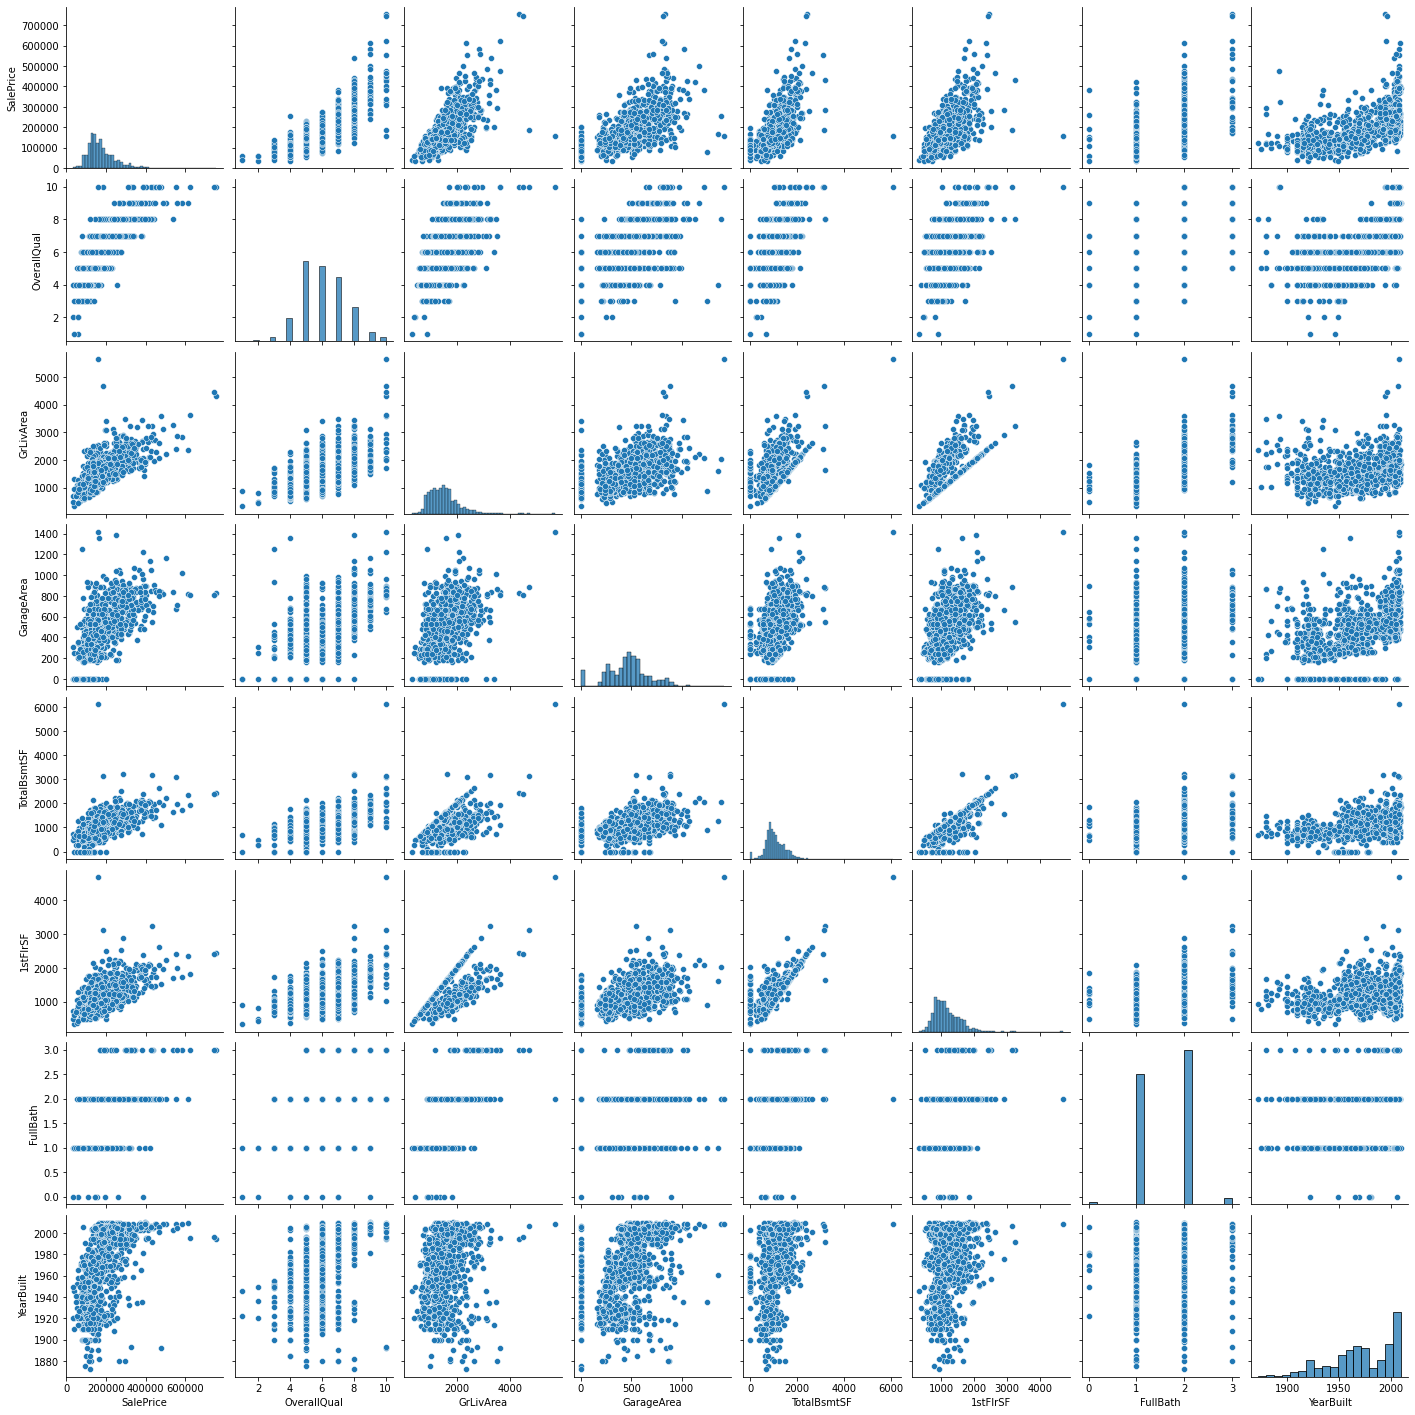

In [16]:
col=['SalePrice','OverallQual' , 'GrLivArea' , 'GarageArea' ,'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt']
sns.pairplot(traindata[col])

'GrLivArea' , 'GarageArea' ,'TotalBsmtSF', '1stFlrSF','FullBath' show linear relationship with SalePrice

In [17]:
Y=traindata.SalePrice
traindata=traindata.drop(['SalePrice'],axis=1)
traindata.shape

(1460, 80)

### Missing Value 
First we will look at missing valves in our traindata set 

In [18]:
AllData=pd.concat([traindata ,testdata],axis=0)
AllData.shape

(2919, 80)

In [19]:
total= AllData.isnull().sum().sort_values(ascending = False)
percent= (AllData.isnull().sum()/AllData.isnull().count()).sort_values(ascending= False)
missingdata = pd.concat([total,percent],axis=1,keys=['total','percent'])
missingdata.head(40)

,total,percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


 As we can see PoolQC , MiscFeature ,Alley	,Fence, has  most missing value more than 80% so we willdrop this feature  as well as  FireplaceQu . And due to multicolinearity we will derop 1stFlrSF','GrLivArea','GrageCars' this feature

In [20]:
AllData= AllData.drop(['PoolQC' , 'MiscFeature' ,'Alley' ,'Fence','Id',  'FireplaceQu','1stFlrSF','GrLivArea','GarageCars'],axis=1)

In [21]:
AllData.shape

(2919, 71)

In dataset if there is no garage availabel to  house then entry shows as NA so we will fill this value as 0 it mean it has no garage  and same goes for BsmtExposure and BsmtFinType2	

In [22]:
Garage_feature=['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual']
Basment_feature=['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']
for i in Garage_feature:
    AllData[i].fillna(0,inplace=True )

for i in Basment_feature:
    AllData[i].fillna(0,inplace=True )

AllData['LotFrontage'].fillna(AllData['LotFrontage'].mean(),inplace=True)
AllData['MasVnrArea'].fillna(AllData['MasVnrArea'].mean(),inplace=True)
AllData['MasVnrType'].fillna(0,inplace=True )
AllData['Electrical'].fillna(AllData['Electrical'].mode()[0],inplace=True)


AllData['BsmtHalfBath'].fillna(0,inplace=True )
AllData['Utilities'].fillna('AllPub',inplace=True )
AllData['Functional'].fillna('Typ',inplace=True )
#testdata['BsmtHalfBath'].fillna(0,inplace=True )
AllData['BsmtFinSF1'].fillna(traindata['BsmtFinSF1'].mode()[0],inplace=True)
AllData['BsmtFinSF2'].fillna(traindata['BsmtFinSF2'].mode()[0],inplace=True)
AllData['KitchenQual'].fillna(traindata['KitchenQual'].mode()[0],inplace=True)
AllData['TotalBsmtSF'].fillna(traindata['TotalBsmtSF'].mode()[0],inplace=True)
AllData['Exterior2nd'].fillna(traindata['Exterior2nd'].mode()[0],inplace=True)
#testdata['GarageCars'].fillna(traindata['GarageCars'].mode()[0],inplace=True)
AllData['Exterior1st'].fillna(traindata['Exterior1st'].mode()[0],inplace=True)
AllData['GarageArea'].fillna(traindata['GarageArea'].mode()[0],inplace=True)
AllData['SaleType'].fillna(traindata['SaleType'].mode()[0],inplace=True)
AllData['MSZoning'].fillna(traindata['MSZoning'].mode()[0],inplace=True)
AllData['BsmtFullBath'].fillna(traindata['BsmtFullBath'].mode()[0],inplace=True)
AllData['BsmtUnfSF'].fillna(traindata['BsmtUnfSF'].mode()[0],inplace=True)

In [23]:
AllData['GarageYrBlt'] = 2021-AllData['GarageYrBlt']
AllData['YearBuilt'] = 2021-AllData['YearBuilt']
AllData['YearRemodAdd'] = 2021-AllData['YearRemodAdd']
AllData['YrSold'] = 2021-AllData['YrSold']
AllData[['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']].head()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
0,18.0,18,18,13
1,45.0,45,45,14
2,20.0,20,19,13
3,23.0,106,51,15
4,21.0,21,21,13


In [24]:
AllData.isnull().sum().max()

0

### Skweness
Lets Chek the skwenees of feature of traindata fix the skwness as we know while doing the regression Normality is one of the assumption

First we seperate the Numerical and Catagorical Variabel

In [25]:
numerical_feature=AllData.select_dtypes(exclude=['object']).columns
cataorical_feature=AllData.select_dtypes(include=['object']).columns
numerical_feature

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [26]:
len(numerical_feature)

33

In [27]:
len(cataorical_feature)

38

In [28]:
All_num = AllData[numerical_feature]
All_cat = AllData[cataorical_feature]
All_num.shape

(2919, 33)

In [29]:
# checkin skewmess of all features
skewness = All_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
GarageYrBlt       3.906205
MasVnrArea        2.611549
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.645574
BsmtFinSF1        1.425230
MSSubClass        1.375457
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
YearBuilt         0.599806
OverallCond       0.570312
YearRemodAdd      0.451020
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold           -0.132399
dtype: float64

In [30]:
skewness_Y=skew(Y)
skewness_Y

1.880940746034036

### we will select the feature whos skewness >0.5

In [31]:
skewness=skewness[abs(skewness)>0.5]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [32]:
All_num[skewness.index]=np.log1p(All_num[skewness.index])
Y=np.log1p(Y)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Dealing with categorical variabel

In [33]:
All_cat.shape

(2919, 38)

In [34]:
All_cat=pd.get_dummies(All_cat,drop_first=True)
All_cat

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
AllData_1=pd.concat([All_cat,All_num],axis=1)

In [36]:
AllData_1.shape

(2919, 239)

### Checking and removing Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SalePrice'>

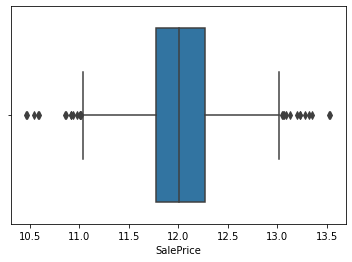

In [37]:
sns.boxplot(Y)

##### As we can see from boxplot the are many outlier in SalePrice .We will use Z-score tretment for detectin and removin the outliers

As we can see  in LotArea max: 12.279537  and min is : 7.170888 after processing this we will see the result

In [38]:
AllData_1['LotArea'].describe()

count    2919.000000
mean        9.094915
std         0.509882
min         7.170888
25%         8.919854
50%         9.154193
75%         9.356257
max        12.279537
Name: LotArea, dtype: float64

In [39]:
def outlier(z):
    upper_limit= AllData_1[z].mean()+ 3* AllData_1[z].std()
    lower_limit=  AllData_1[z].mean()- 3* AllData_1[z].std()
    AllData_1[z]=np.where( AllData_1[z]>upper_limit ,upper_limit,
                   np.where( AllData_1[z]<lower_limit, lower_limit ,
                             AllData_1[z]
                   )
        )
    print('Upperlimit : {} and lowerlimit : {} and Columns name is: {}'.format(upper_limit,lower_limit,z))
    

In [40]:
for i in numerical_feature:
    outlier(i)
    

  

Upperlimit : 5.897811905384556 and lowerlimit : 1.7431943515673818 and Columns name is: MSSubClass
Upperlimit : 5.168644483153993 and lowerlimit : 3.2425786277104196 and Columns name is: LotFrontage
Upperlimit : 10.624561546808522 and lowerlimit : 7.565269323056729 and Columns name is: LotArea
Upperlimit : 10.318913219707035 and lowerlimit : 1.8592299800188998 and Columns name is: OverallQual
Upperlimit : 2.3866665656479547 and lowerlimit : 1.3476378163974605 and Columns name is: OverallCond
Upperlimit : 5.709020325857788 and lowerlimit : 1.7395426266852958 and Columns name is: YearBuilt
Upperlimit : 99.41855856654428 and lowerlimit : -25.94750683649974 and Columns name is: YearRemodAdd
Upperlimit : 9.987752553858686 and lowerlimit : -5.756206632535365 and Columns name is: MasVnrArea
Upperlimit : 13.170477064366757 and lowerlimit : -4.720566423447905 and Columns name is: BsmtFinSF1
Upperlimit : 6.31656499730146 and lowerlimit : -4.954617953490826 and Columns name is: BsmtFinSF2
Upperli

In [41]:
AllData_1['LotArea'].describe()

count    2919.000000
mean        9.094463
std         0.488794
min         7.565269
25%         8.919854
50%         9.154193
75%         9.356257
max        10.624562
Name: LotArea, dtype: float64

As we can see  in LotArea max: 10.624562  and min is : 7.565269 . so this how capping done And insted of droping the outlier we will replace it from this processes we will not lose the information 

In [42]:
Y.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [43]:
Y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [44]:
max_limit= Y.mean()+ 3*Y.std()
min_limit= Y.mean()- 3*Y.std()
print(min_limit , max_limit)
Y=np.where( Y > max_limit , max_limit ,
                   np.where( Y< min_limit, min_limit ,
                             Y
                   )
        )

10.825709574950851 13.22240521488589


In [45]:
Y

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [46]:
traindata.shape ,testdata.shape

((1460, 80), (1459, 80))

In [47]:
traindata_1=AllData_1.iloc[:1460,:]
#pd.concat([traindata_1,Y],axis=1)
traindata_1

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2.0,13.0
1,0,0,1,0,1,0,0,1,0,0,...,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.0,14.0
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9.0,13.0
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2.0,15.0
4,0,0,1,0,1,0,0,0,0,0,...,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,460.0,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8.0,14.0
1456,0,0,1,0,1,0,0,1,0,0,...,500.0,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.0,11.0
1457,0,0,1,0,1,0,0,1,0,0,...,252.0,0.000000,4.110874,0.000000,0.0,0.0,0.0,3.955384,5.0,11.0
1458,0,0,1,0,1,0,0,1,0,0,...,240.0,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,4.0,11.0


In [48]:
testdata_1=AllData_1.iloc[1460:,:]
testdata_1

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,0,0,1,0,0,1,0,0,...,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6.0,11.0
1,0,0,1,0,1,0,0,0,0,0,...,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,3.955384,6.0,11.0
2,0,0,1,0,1,0,0,0,0,0,...,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3.0,11.0
3,0,0,1,0,1,0,0,0,0,0,...,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6.0,11.0
4,0,0,1,0,1,0,0,0,1,0,...,506.0,0.000000,4.418841,0.0,0.0,4.830637,0.0,0.000000,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.0,15.0
1455,0,0,0,1,1,0,0,1,0,0,...,286.0,0.000000,3.218876,0.0,0.0,0.000000,0.0,0.000000,4.0,15.0
1456,0,0,1,0,1,0,0,1,0,0,...,576.0,6.163315,0.000000,0.0,0.0,0.000000,0.0,0.000000,9.0,15.0
1457,0,0,1,0,1,0,0,1,0,0,...,0.0,4.394449,3.496508,0.0,0.0,0.000000,0.0,3.955384,7.0,15.0


In [49]:
X = traindata_1

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
RFR =RandomForestRegressor(n_jobs=-1,random_state=1)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
para={
    'max_depth':[2,5,10,50,100,150],
    'min_samples_leaf':[2,5,7,50,100,200],
    'n_estimators':[5,10,30,50,100,200]
}

In [54]:
%%time
grid_serch=GridSearchCV(estimator=RFR,
                       param_grid=para,
                      cv=5,
                      n_jobs=-1, scoring="neg_mean_squared_error" ,verbose=1
                      )

CPU times: user 51 µs, sys: 4 µs, total: 55 µs
Wall time: 58.9 µs


In [55]:
grid_serch.fit(X,Y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.8min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50, 100, 150],
                         'min_samples_leaf': [2, 5, 7, 50, 100, 200],
                         'n_estimators': [5, 10, 30, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
rfbest_estimator=grid_serch.best_estimator_
rfbest_estimator

RandomForestRegressor(max_depth=100, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1, random_state=1)

In [57]:
rfbest_estimator.feature_importances_

array([7.08902875e-05, 2.71213025e-05, 1.88172579e-03, 3.13714105e-03,
       1.28151423e-04, 1.20714720e-04, 1.75058431e-06, 9.61584451e-04,
       4.00152812e-05, 7.87810883e-05, 6.81672969e-04, 0.00000000e+00,
       1.94750509e-04, 4.49829832e-05, 0.00000000e+00, 5.45675545e-04,
       4.55148214e-04, 1.69904668e-05, 0.00000000e+00, 1.57803575e-05,
       1.92722072e-04, 1.42663826e-04, 2.35112524e-04, 1.24736249e-03,
       8.80184653e-04, 5.49170671e-05, 9.80418506e-04, 2.85340292e-05,
       6.05309309e-05, 3.30735454e-04, 7.74978012e-05, 1.75756027e-04,
       2.69043853e-04, 6.74373524e-05, 6.00277976e-04, 5.74695729e-05,
       2.10789564e-04, 2.46459299e-05, 3.11856461e-04, 1.22275430e-04,
       5.23025939e-05, 1.86800439e-05, 1.83656801e-04, 6.97954767e-04,
       9.73988648e-08, 6.17199637e-05, 9.61955064e-05, 1.43669418e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49364466e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [58]:
imp_fea=pd.DataFrame({
    'variable':X.columns,
    'imp': rfbest_estimator.feature_importances_
})
feature=imp_fea.sort_values(by='imp',ascending= False)
feature.head(50)

,variable,imp
209,OverallQual,0.604682
229,GarageArea,0.068497
217,TotalBsmtSF,0.052694
208,LotArea,0.029433
218,2ndFlrSF,0.022054
214,BsmtFinSF1,0.020693
222,FullBath,0.019807
227,Fireplaces,0.015647
226,TotRmsAbvGrd,0.010748
207,LotFrontage,0.010656


### Scaling the Data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()

In [61]:
col=X.columns
X=pd.DataFrame(sc.fit_transform(X))
X.columns = col
X

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,0.359028,-0.946701,0.845209,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-1.599111,-0.138777
1,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-0.057945,1.249540,-1.072916,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-0.489110,0.614439
2,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,...,0.643328,-0.946701,0.675137,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,0.990891,-0.138777
3,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,...,0.804431,-0.946701,0.592558,2.845341,-0.129279,-0.293584,-0.069409,-0.192177,-1.599111,1.367655
4,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,...,1.723666,1.080884,0.991848,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,2.100892,-0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-0.057945,-0.946701,0.653002,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,0.620891,0.614439
1456,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,0.131588,1.310217,-1.072916,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-1.599111,-1.645210
1457,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-1.043517,-0.946701,0.837652,-0.404272,-0.129279,-0.293584,-0.069409,5.203549,-0.489110,-1.645210
1458,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-1.100376,1.328490,-1.072916,2.334342,-0.129279,-0.293584,-0.069409,-0.192177,-0.859110,-1.645210


In [62]:
col=testdata_1.columns
testdata_1=pd.DataFrame(sc.fit_transform(testdata_1))
testdata_1.columns = col
testdata_1

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.231148,12.037442,-1.810688,-0.445926,0.06426,-0.156776,-0.06426,0.749732,-0.224490,-0.129324,...,1.205045,0.968486,-1.093550,-0.450639,-0.094817,3.069688,-0.06426,-0.190320,-0.038281,-1.713905
1,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,-1.333809,-0.224490,-0.129324,...,-0.744524,1.365515,0.581419,-0.450639,-0.094817,-0.325727,-0.06426,5.254317,-0.038281,-1.713905
2,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,-1.333809,-0.224490,-0.129324,...,0.048363,1.127876,0.555642,-0.450639,-0.094817,-0.325727,-0.06426,-0.190320,-1.140614,-1.713905
3,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,-1.333809,-0.224490,-0.129324,...,-0.007606,1.331718,0.581419,-0.450639,-0.094817,-0.325727,-0.06426,-0.190320,-0.038281,-1.713905
4,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,-1.333809,4.454532,-0.129324,...,0.160300,-0.943556,0.956184,-0.450639,-0.094817,3.094359,-0.06426,-0.190320,-1.875504,-1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.231148,-0.083074,-1.810688,2.242527,0.06426,-0.156776,-0.06426,0.749732,-0.224490,-0.129324,...,-2.199705,-0.943556,-1.093550,-0.450639,-0.094817,-0.325727,-0.06426,-0.190320,-0.038281,1.359958
1455,-0.231148,-0.083074,-1.810688,2.242527,0.06426,-0.156776,-0.06426,0.749732,-0.224490,-0.129324,...,-0.865789,-0.943556,0.399565,-0.450639,-0.094817,-0.325727,-0.06426,-0.190320,-0.773170,1.359958
1456,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,0.749732,-0.224490,-0.129324,...,0.486783,1.437751,-1.093550,-0.450639,-0.094817,-0.325727,-0.06426,-0.190320,1.064053,1.359958
1457,-0.231148,-0.083074,0.552276,-0.445926,0.06426,-0.156776,-0.06426,0.749732,-0.224490,-0.129324,...,-2.199705,0.754318,0.528348,-0.450639,-0.094817,-0.325727,-0.06426,5.254317,0.329164,1.359958


In [63]:
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split as tts

Using RFE for Initial Feature Selection

In [64]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split as tts

In [65]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.2,random_state=42)

In [66]:
x_train

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-0.844507,1.182120,-1.072916,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-0.119110,-1.645210
1066,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,...,-0.437011,-0.946701,0.653002,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-0.489110,-0.891994
638,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-2.237575,1.286378,-1.072916,2.553644,-0.129279,-0.293584,-0.069409,-0.192177,-0.489110,-0.138777
799,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-1.100376,-0.946701,-1.072916,2.828111,-0.129279,-0.293584,-0.069409,-0.192177,-0.119110,0.614439
380,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-0.778170,-0.946701,-1.072916,2.777903,-0.129279,-0.293584,-0.069409,-0.192177,-0.489110,-1.645210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,...,-0.152711,-0.946701,0.384335,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-1.229111,0.614439
1130,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,0.491701,1.391314,0.696266,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,2.100892,-0.891994
1294,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,0.472748,-0.946701,-1.072916,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-0.859110,1.367655
860,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,...,-1.214096,-0.946701,1.476195,-0.404272,-0.129279,-0.293584,-0.069409,-0.192177,-0.119110,0.614439


In [67]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 50) # running RFE
rfe = rfe.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [68]:
col = x_train.columns[rfe.support_]
col

Index(['RoofMatl_Membran', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec',
       'BsmtFinType2_Unf', 'Electrical_Mix', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'OverallQual', 'To

In [69]:
# Creating X_train & X_test dataframes with RFE selected variables
x_train_rfe = x_train[col]
x_test_rfe = x_test[col]
lm.fit(x_train_rfe,y_train)
y_pred_rfe=lm.predict(x_test_rfe)
mean_squared_error(y_test,y_pred_rfe)

2.2237057275647254e+23

**Building model using Ridge Regression with RFE feature**

In [70]:

params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.118439,-0.125415,1
1,0.0005,-0.118439,-0.125415,2
2,0.001,-0.118439,-0.125415,3
3,0.005,-0.118439,-0.125415,4
4,0.01,-0.118439,-0.125416,5
5,0.02,-0.118440,-0.125417,6
6,0.1,-0.118448,-0.125424,7
7,0.2,-0.118458,-0.125433,8
8,0.3,-0.118467,-0.125442,9
9,0.4,-0.118477,-0.125451,10


In [72]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)

{'alpha': 0.0001}


In [73]:
# Building the model with alpha
ridge = Ridge(alpha=ridge_model_cv.best_params_['alpha'])

ridge.fit(x_train_rfe, y_train)
y_train_pred = ridge.predict(x_train_rfe)
y_test_pred = ridge.predict(x_test_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8115168037563523
0.8359283609703227


**Building model using Ridge Regression with all Data**

In [74]:
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,5.0,-0.065143,-0.096356,1
20,6.0,-0.065417,-0.096373,2
18,4.0,-0.064858,-0.096375,3
21,7.0,-0.065677,-0.096402,4
17,3.0,-0.064555,-0.096441,5
22,8.0,-0.065927,-0.096453,6
23,9.0,-0.066169,-0.096503,7
16,2.0,-0.064254,-0.096546,8
24,10.0,-0.066398,-0.096554,9
27,100,-0.072597,-0.096617,10


In [76]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)

{'alpha': 5.0}


In [77]:
# Building the model with alpha
ridge = Ridge(alpha=ridge_model_cv.best_params_['alpha'])

ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9407065910539287
0.8728978210119791


In [78]:
mean_squared_error(y_test,y_test_pred)

0.022551218831260416

In [79]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = x_train.columns
model_rigi_coe=pd.DataFrame(list(zip(model_param ,col)))
model_rigi_coe.head()

,0,1
0,12.024398,RoofMatl_Membran
1,0.034438,Exterior1st_CBlock
2,0.019678,Exterior2nd_CBlock
3,0.051325,BsmtQual_Ex
4,0.045315,BsmtQual_Fa


**Building model using Lasso Regression**

In [80]:
lasso = Lasso()

folds = 10
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17672227572867882, tolerance: 0.016059636100897702
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17928869077489917, tolerance: 0.015373502201976997
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16759580554517406, tolerance: 0.015738809000048086
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective 

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.005,-0.082416,-0.093406,1
1,0.0005,-0.068076,-0.094174,2
2,0.001,-0.071482,-0.094889,3
0,0.0001,-0.065668,-0.095116,4
4,0.01,-0.089304,-0.096022,5
5,0.02,-0.101132,-0.105549,6
6,0.1,-0.173134,-0.174663,7
7,0.2,-0.235263,-0.235726,8
8,0.3,-0.296142,-0.296678,9
27,100,-0.302192,-0.302409,10


In [82]:
#checking the value of optimum number of parameters
print(lasso_model_cv.best_params_)

{'alpha': 0.005}


In [83]:

lasso = Lasso(alpha=lasso_model_cv.best_params_['alpha'])

lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9076632216340504
0.8925528943823127


In [84]:
mean_squared_error(y_test,y_test_pred)

0.019063899697568422

**Finding :**
The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 5.0

Lasso - 0.005

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.02255

Lasso - 0.01906


The r2_score for test data in case of Ridge and Lasso are:

Ridge - 87.9%

Lasso - 89.02%

In [85]:
testdata_1.isnull().sum().sort_values(ascending=False)


GarageYrBlt            1
MSZoning_FV            0
KitchenQual_Gd         0
Heating_OthW           0
Heating_Wall           0
                      ..
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
YrSold                 0
Length: 239, dtype: int64

In [86]:
testdata_1['GarageYrBlt'].fillna(traindata['GarageYrBlt'].mode()[0],inplace=True)
testdata_1.isnull().sum().sort_values(ascending=False)

MSZoning_FV            0
KitchenQual_Gd         0
Heating_OthW           0
Heating_Wall           0
HeatingQC_Fa           0
                      ..
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
YrSold                 0
Length: 239, dtype: int64

**So for Final Prediction we use Lasso Regression**

In [87]:
y_pred=lasso.predict(testdata_1)
y_pred_final=np.exp(y_pred)

In [88]:
submission=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [89]:
submission.iloc[:, 1] =y_pred_final
submission.to_csv('submission.csv', index=False)

In [90]:
y_pred_final[0]

134371.4486833438